In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import datetime
import math



In [ ]:
WB=gc.open_by_url('https://docs.google.com/spreadsheets/d/1NicrU-xR2_juUVStzRAuUNaYbpmBfo93xJ10JjLTeGE/edit#gid=562202313')

In [ ]:

overall=WB.worksheet('overall')
df1=pd.DataFrame(overall.get_all_records())
temp=df1['COMPANY']
lst=['Date','Open','High','Low','Close','Volume','Company']
databas=pd.DataFrame(columns=lst)
for x in temp:
  sheet=WB.worksheet(x)
  df2=pd.DataFrame(sheet.get_all_records(),columns=lst)
  df2['Company']=x
  for i in range(0,len(df2)):
    temp=str(df2['Date'][i])[0:10]
    df2['Date'][i]=temp
  databas = databas.append(df2, ignore_index=True)
databas

  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Date,Open,High,Low,Close,Volume,Company
0,26/03/2018,3414.00,3501.70,3365.50,3481.70,359650,HEROMOTOCO
1,27/03/2018,3485.10,3488.00,3436.00,3464.70,325438,HEROMOTOCO
2,28/03/2018,3455.00,3579.00,3428.05,3542.80,786796,HEROMOTOCO
3,02/04/2018,3544.00,3654.65,3512.20,3646.00,244943,HEROMOTOCO
4,03/04/2018,3644.95,3669.00,3621.00,3644.95,318581,HEROMOTOCO
...,...,...,...,...,...,...,...
52586,25/04/2022,12.40,12.50,12.20,12.25,369299,AKSHOPTFBR
52587,26/04/2022,12.40,12.60,12.25,12.35,331689,AKSHOPTFBR
52588,27/04/2022,12.40,12.45,11.65,12.05,330766,AKSHOPTFBR
52589,28/04/2022,12.55,12.55,11.95,12.05,337001,AKSHOPTFBR


In [ ]:
df1['COMPANY']

0     HEROMOTOCO
1            M&M
2     ROLEXRINGS
3       TVSMOTOR
4         FINOPB
5          GICRE
6        INDIANB
7          L&TFH
8            PFC
9        SBICARD
10          SBIN
11       YESBANK
12     AMBUJACEM
13      INDIACEM
14     BODALCHEM
15          GNFC
16    VINATIORGA
17        ASHOKA
18     BAJAJELEC
19       HAVELLS
20        VIPIND
21    ENGINERSIN
22       TRIVENI
23     BRITANNIA
24         DABUR
25    HINDUNILVR
26           ITC
27     NESTLEIND
28      SANWARIA
29       VENKEYS
30     GOLDSHARE
31       HCLTECH
32      GRAPHITE
33     COALINDIA
34    HINDCOPPER
35      HINDALCO
36          SAIL
37     SHYAMMETL
38     TATASTEEL
39          VEDL
40    ASIANPAINT
41    BERGEPAINT
42    AUROPHARMA
43      CADILAHC
44         CIPLA
45      DIVISLAB
46        PFIZER
47          BPCL
48    CHENNPETRO
49          GAIL
50     HINDPETRO
51          ONGC
52        KHADIM
53    COCHINSHIP
54        CONCOR
55    AKSHOPTFBR
Name: COMPANY, dtype: object

In [ ]:
plt.figure(figsize=(30,30))

company=input("enter company code")

sheet=WB.worksheet(company)
df2=pd.DataFrame(sheet.get_all_records(),columns=lst)
use=df2.iloc[:,1]
plt.plot(use)
plt.ylabel('Close')
plt.xlabel('Date')
plt.title(f"Closing Price of {company}")

plt.tight_layout()

SyntaxError: ignored

In [ ]:
test_set=df2.iloc[df2.shape[0]-20:,1:2].values
training_set=df2.iloc[:df2.shape[0]-20,1:2].values

#Scaling data

In [ ]:

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=[0,1])
train_set_scaled=sc.fit_transform(training_set)
train_set_scaled.shape

(991, 1)

#Data structure of 60 timesteps and one output


In [ ]:
X_train=[]
Y_train=[]
for i in range(60,991):
    X_train.append(train_set_scaled[i-60:i,0])
    Y_train.append(train_set_scaled[i,0])


In [ ]:
X_train,Y_train= np.array(X_train),np.array(Y_train)

#Reshape into 3D tensor

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#Importing keras libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Building Rnn

In [ ]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

#Compiling RNN

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

#Training RNN

In [ ]:
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0017
Epoch 2/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0016
Epoch 3/100
30/30 [==============================] - 4s 143ms/step - loss: 0.0016
Epoch 4/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0016
Epoch 5/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0014
Epoch 6/100
30/30 [==============================] - 4s 119ms/step - loss: 0.0015
Epoch 7/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0017
Epoch 8/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0015
Epoch 9/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0015
Epoch 10/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0015
Epoch 11/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0014
Epoch 12/100
30/30 [==============================] - 4s 119ms/step - loss: 0.0014
Epoch 13/100


#Predictions using RNN

In [ ]:
dataset_total=np.append(training_set,test_set)
inputs=dataset_total[len(dataset_total)-len(test_set)-60:]
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1043.7395 ],
       [1040.0056 ],
       [1033.3363 ],
       [1028.9764 ],
       [1038.3612 ],
       [1031.2478 ],
       [1040.0518 ],
       [1046.3761 ],
       [1033.4369 ],
       [1033.5603 ],
       [1041.3126 ],
       [1036.3359 ],
       [1043.6324 ],
       [1029.0619 ],
       [1030.1023 ],
       [1022.56714],
       [ 997.0903 ],
       [ 986.1501 ],
       [ 987.7112 ],
       [1001.28436]], dtype=float32)

#Visualize results

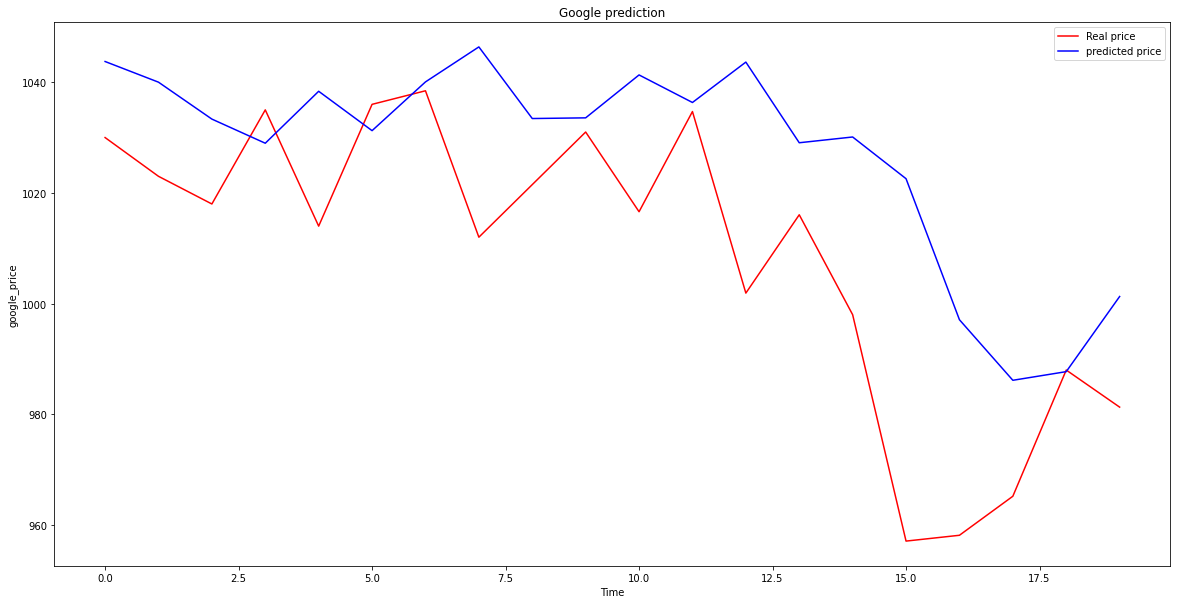

In [ ]:
plt.plot(test_set,color='red',label='Real price')
plt.plot(predicted_stock_price,color='blue',label='predicted price')
plt.title("Google prediction")
plt.xlabel("Time")
plt.ylabel("google_price")
plt.legend()
plt.show()


In [ ]:
ext=training_set[len(training_set)-40:]
final=np.append(ext,test_set)
final=final.reshape(-1,1)
final=sc.transform(final)
final

array([[0.8175389 ],
       [0.81400283],
       [0.82461103],
       [0.82213579],
       [0.81499293],
       [0.79674682],
       [0.827157  ],
       [0.84724187],
       [0.82956153],
       [0.81612447],
       [0.77305516],
       [0.80339463],
       [0.79886846],
       [0.78854314],
       [0.75403112],
       [0.74002829],
       [0.77121641],
       [0.74936351],
       [0.75388967],
       [0.77800566],
       [0.76534653],
       [0.78500707],
       [0.79066478],
       [0.78062235],
       [0.80339463],
       [0.8480198 ],
       [0.86570014],
       [0.86881188],
       [0.95473833],
       [0.95473833],
       [1.        ],
       [0.97029703],
       [0.98698727],
       [0.95473833],
       [0.95459689],
       [0.91089109],
       [0.93818953],
       [0.92220651],
       [0.91966054],
       [0.95190948],
       [0.93352192],
       [0.92362093],
       [0.9165488 ],
       [0.94059406],
       [0.91089109],
       [0.94200849],
       [0.94547383],
       [0.908

In [ ]:
X_test=np.reshape(final,(1,final.shape[0],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)


[[1001.77075]]
